## Exploritory Data Analysis 

Here is a simple exploratory data analysis, the following methods were implemented:
- Reciept Count Visuals 
- Base Linear Model with MSE Calculation 
- Base Time Series Forcasting:
    1) Simple Moving Average Method (SMA)
    2) Cumulative Moving Average (CMA)
    3) Exponential Moving Average (EMA)

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data
reciept_data = pd.read_csv('data/data_daily.csv')
reciept_data.head(10)

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289
5,2021-01-06,7473320
6,2021-01-07,7832624
7,2021-01-08,7765028
8,2021-01-09,7385245
9,2021-01-10,7392087


In [3]:
reciept_data.describe()

,Receipt_Count
count,3.650000e+02
mean,8.826566e+06
std,7.820089e+05
min,7.095414e+06
25%,8.142874e+06
50%,8.799249e+06
75%,9.476970e+06
max,1.073886e+07


In [4]:
# Filter dataset date time stamps
reciept_data['x'] = [i for i in range(1,366)]
reciept_data['month'] = pd.to_datetime(reciept_data['# Date']).dt.month
reciept_data['day'] = pd.to_datetime(reciept_data['# Date']).dt.day
reciept_data['year'] = pd.to_datetime(reciept_data['# Date']).dt.year

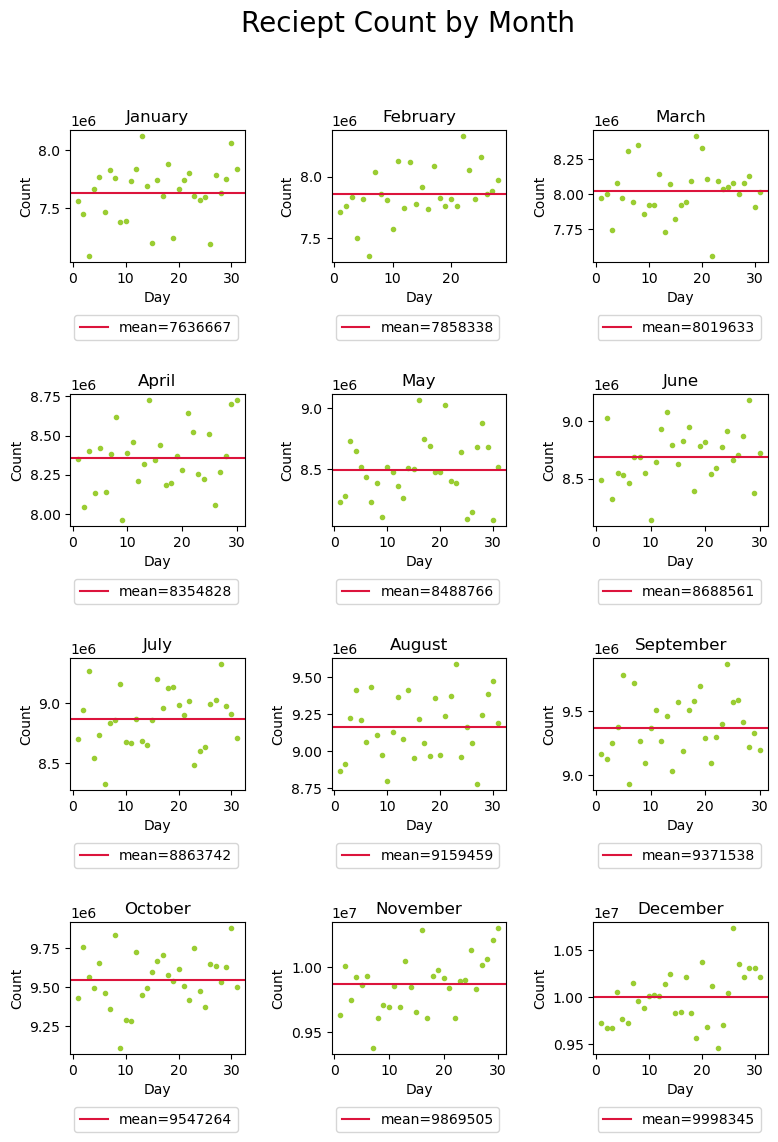

In [5]:
fig, ax = plt.subplots(4,3, figsize = (9,12))
fig.subplots_adjust(hspace = 1, wspace=.5)
ax = ax.flatten()

index = [i for i in range(1,13)]
months = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

for i in index:
    month_rc = reciept_data[reciept_data['month']==i]['Receipt_Count']
    ax[i-1].plot(reciept_data[reciept_data['month']==i]['day'],month_rc,'.', color = 'yellowgreen')
    ax[i-1].axhline(y = month_rc.mean(), color = 'crimson', label = f'mean={round(month_rc.mean())}')
    ax[i-1].set_xlabel('Day')
    ax[i-1].set_ylabel('Count')
    ax[i-1].set_title(f'{months[i-1]}')
    ax[i-1].legend(bbox_to_anchor=(1, -0.35))


fig.suptitle('Reciept Count by Month', fontsize=20)
plt.show()

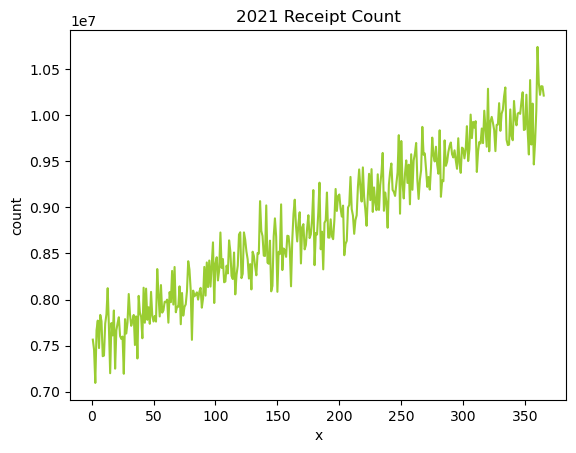

In [6]:
# Plot Data  
plt.plot(reciept_data['x'],reciept_data['Receipt_Count'], color = 'yellowgreen')
plt.title('2021 Receipt Count')
plt.xlabel('x')
plt.ylabel('count')
plt.show()

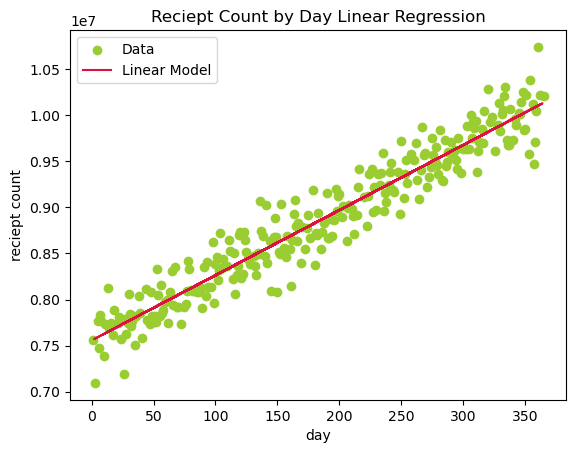

Coefficients: 
 [7062.56592961]
Mean squared error: 53553811849.76


In [7]:
# Base Model 1 - Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

day_data = reciept_data[['x','Receipt_Count']].sample(frac = 1,ignore_index=True)

X = day_data[['x']]
y = day_data['Receipt_Count']

# Slipt Data - Test & Train 
X_train, X_test, y_train,y_test = train_test_split(X,y)

# Build & Fit Model
linear_model = LinearRegression().fit(X_train,y_train)

# y_hat 
y_predict = linear_model.predict(X_test)

# Plot 
# Plot outputs
plt.scatter(X_train, y_train, color="yellowgreen", label = 'Data')
plt.plot(X_test, y_predict, color="crimson", label = 'Linear Model')

plt.title('Reciept Count by Day Linear Regression')
plt.xlabel('day')
plt.ylabel('reciept count')
plt.legend()
plt.show()

# Model Information 
month_mse = mean_squared_error(y_test,y_predict)
print("Coefficients: \n", linear_model.coef_)
print("Mean squared error: %.2f" % month_mse)


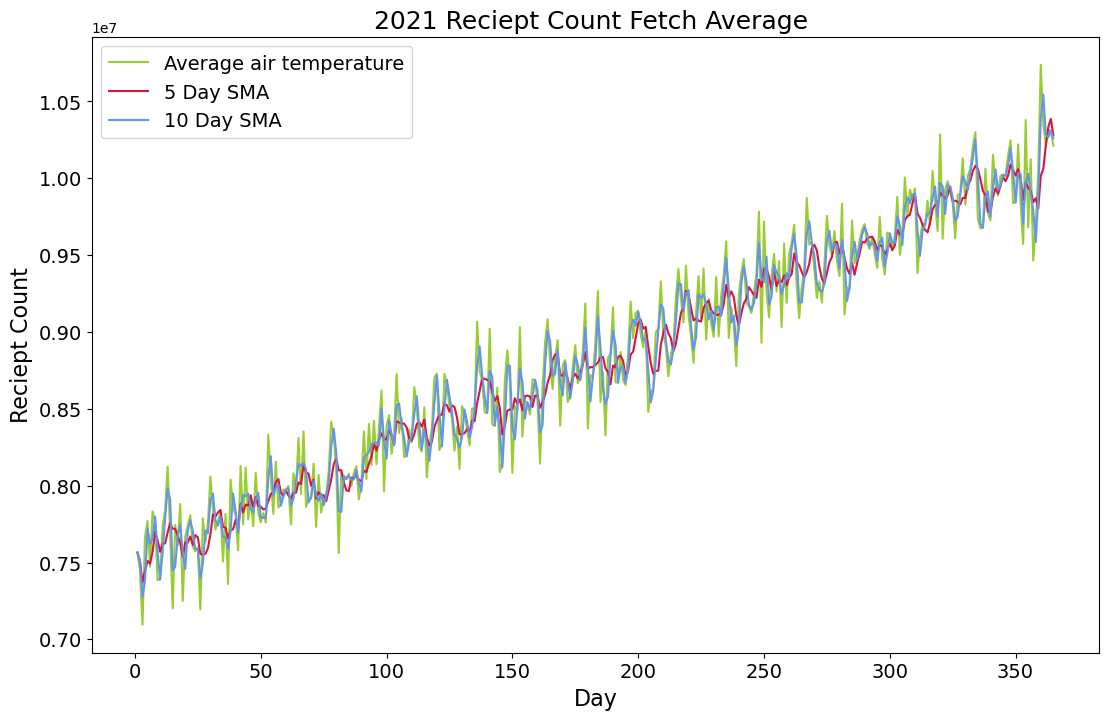

In [8]:
# Since we know we are dealing with a nonstationary dataset, it would be best to do a Forcasting Model Decision 


# CALCULATE MOVING AVERAGES 

# Simple moving Average (sma)
#reciept_data.set_index('Any', inplace=True)
reciept_data.index.name = 'x'
reciept_data['average_rc'] = reciept_data[['x','Receipt_Count']].mean(axis=1)

# Since we are thinking about shopping behavior 
#lets say people get more reciepts on the (15th &30th), according to research people go to the store every 2 days 
reciept_data['SMA_5'] = reciept_data.Receipt_Count.rolling(5, min_periods=1).mean()
reciept_data['SMA_10'] = reciept_data.Receipt_Count.rolling(2,min_periods=1).mean()


# Line Plots
plt.figure(figsize = (13,8))
plt.plot(reciept_data['x'], reciept_data['Receipt_Count'], color='yellowgreen')
plt.plot(reciept_data['x'], reciept_data['SMA_5'],color = 'crimson')
plt.plot(reciept_data['x'], reciept_data['SMA_10'], color = 'cornflowerblue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average air temperature', '5 Day SMA', '10 Day SMA'], fontsize=14)
plt.title('2021 Reciept Count Fetch Average ', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Reciept Count', fontsize=16)
plt.show()

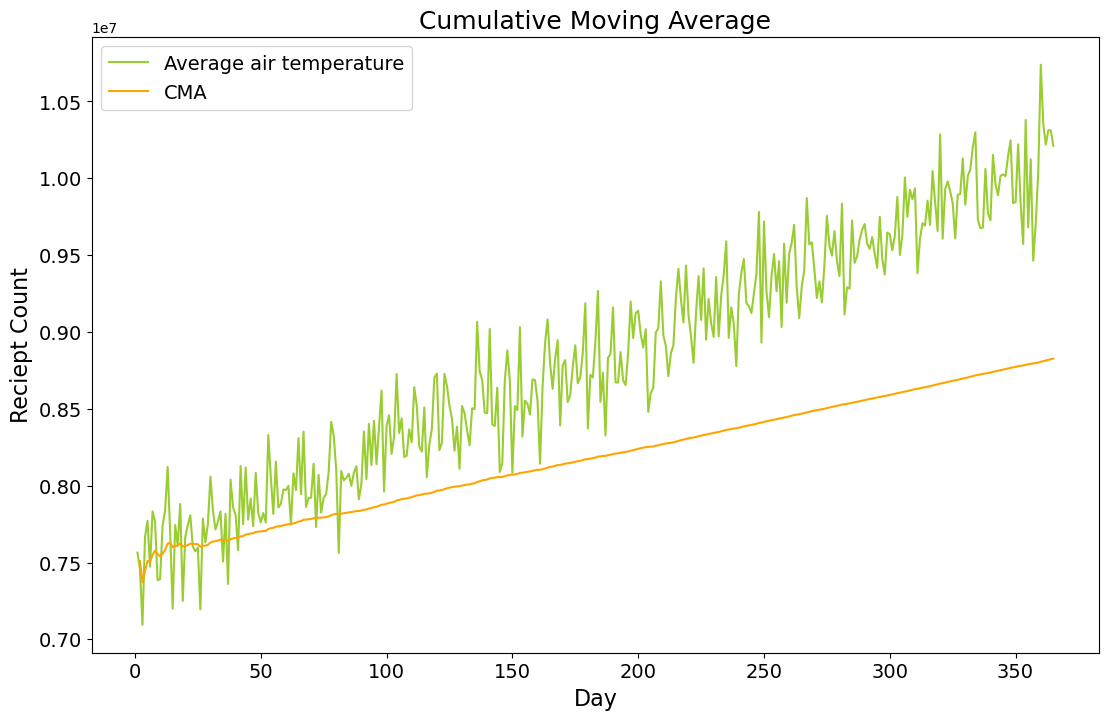

In [9]:
# Cumulative Moving Average(CMA)
reciept_data['CMA'] = reciept_data.Receipt_Count.expanding(min_periods=2).mean()

# CMA Plot
plt.figure(figsize = (13,8))
plt.plot(reciept_data['x'], reciept_data['Receipt_Count'], color='yellowgreen')
plt.plot(reciept_data['x'], reciept_data['CMA'], color = 'orange')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average air temperature', 'CMA'], fontsize=14)
plt.title('Cumulative Moving Average', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Reciept Count', fontsize=16)
plt.show()

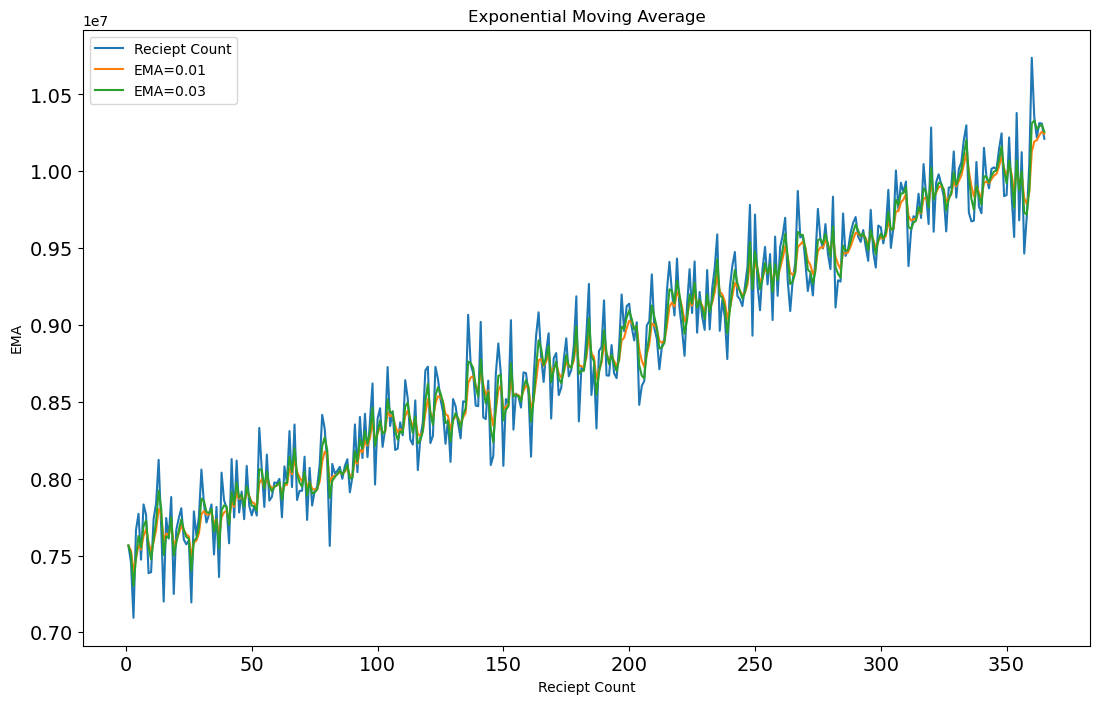

In [10]:
# Exponential Moving Average (EMA)
# Smoothing Factor of α = 0.1 and α = 0.3 
reciept_data['EMA_0.3'] = reciept_data.Receipt_Count.ewm(alpha=0.3, adjust=False).mean()
reciept_data['EMA_0.5'] = reciept_data.Receipt_Count.ewm(alpha=0.5, adjust=False).mean()


# EMA Plot 
plt.figure(figsize = (13,8))
colors = ['green','red', 'yellow']
plt.plot(reciept_data.x, reciept_data.Receipt_Count)
plt.plot(reciept_data.x, reciept_data['EMA_0.3'])
plt.plot(reciept_data.x, reciept_data['EMA_0.5'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Exponential Moving Average')
plt.xlabel('Reciept Count')
plt.ylabel('EMA')
plt.legend(labels = ['Reciept Count', 'EMA=0.01', 'EMA=0.03'])
plt.show()


In [ ]:
# Dumping pkl model
import pickle

pickle.dump(model,open('forcastin_model.pkl','wb'))
